Head of train_dataset.csv:
  Gender Religion Branch Section-1 Section-2 Section-3  Roll-1  Math-1 Theory  \
0      M    Hindu     CE         D         D         A     350             47   
1      F    Hindu    CST         B         B         D      18             84   
2      F    Hindu   AIML         A         A         C      23             74   
3      M    Hindu    CST         B         B         D     212             55   
4      M    Hindu    CST         B         B         D     208             38   

   Physics Theory  Physics Practical  ...  Environmental Science Attendance  \
0              48                 75  ...                            100.00   
1              83                 81  ...                            100.00   
2              85                 86  ...                             92.31   
3              69                 82  ...                            100.00   
4              59                 74  ...                            100.00   

   IOT Work

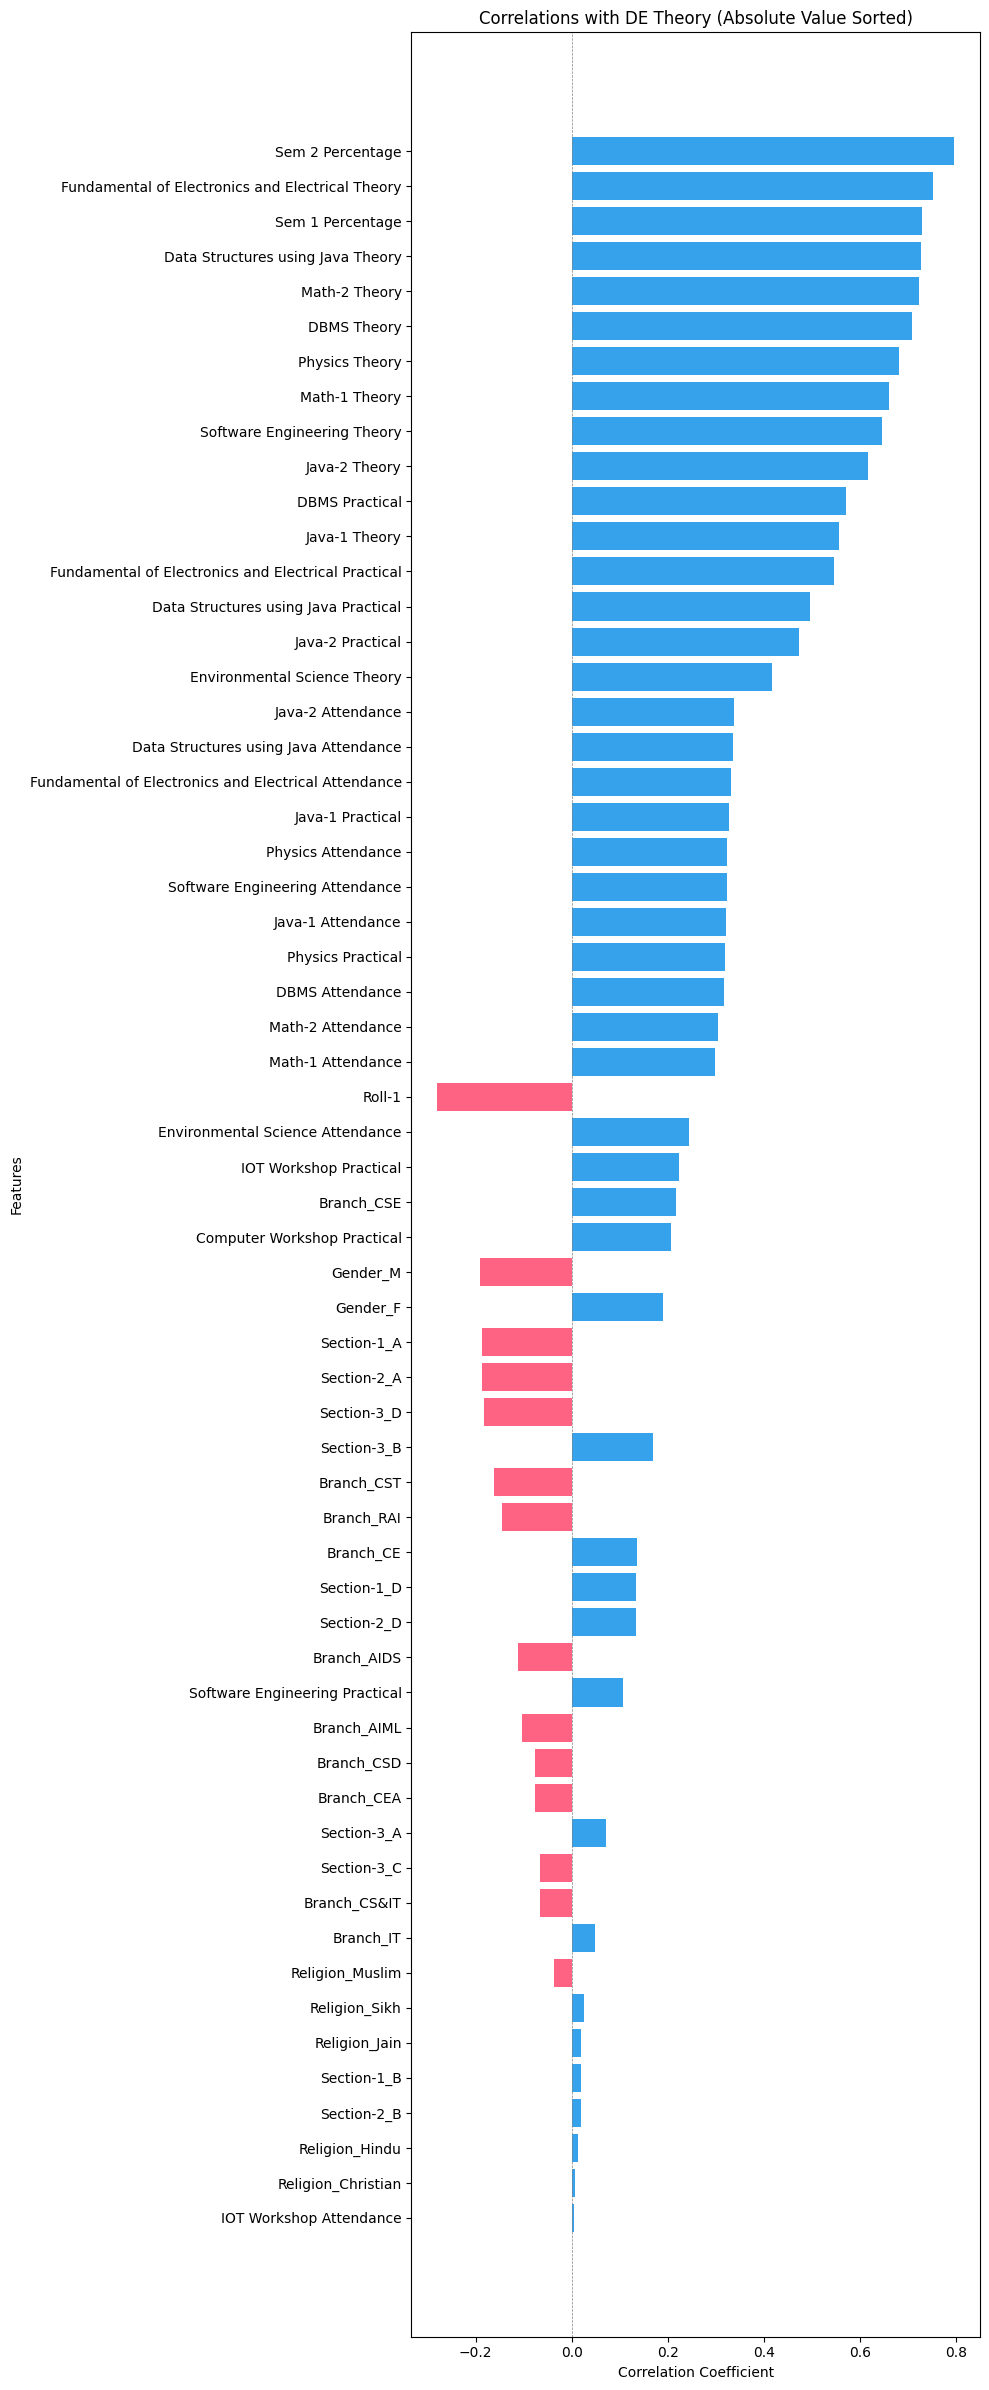

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'Math-3 Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Print the first 5 rows
print("Head of train_dataset.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize a dictionary to store correlations
correlations = {}

# Compute Pearson correlation for numeric columns with DE Theory
for col in numeric_cols:
    if col != 'DE Theory':  # Exclude the target itself
        corr = df[col].corr(df['DE Theory'])
        correlations[col] = corr

# Encode categorical columns for correlation
for col in categorical_cols:
    if col in ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']:
        # One-hot encode categorical columns
        encoded = pd.get_dummies(df[col], prefix=col)
        for encoded_col in encoded.columns:
            corr = encoded[encoded_col].corr(df['DE Theory'])
            correlations[encoded_col] = corr

# Convert Roll-1 to numeric and compute correlation
if 'Roll-1' in df.columns:
    corr = df['Roll-1'].astype(float).corr(df['DE Theory'])
    correlations['Roll-1'] = corr

# Sort correlations by absolute value in descending order
sorted_correlations = dict(sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True))

# Print sorted correlations
print("\nCorrelations with DE Theory (sorted by absolute value):")
for col, corr in sorted_correlations.items():
    print(f"{col}: {corr:.4f}")

# Prepare data for plotting
labels = list(sorted_correlations.keys())
values = list(sorted_correlations.values())

# Create a horizontal bar plot
plt.figure(figsize=(10, max(8, len(labels) * 0.4)))  # Adjust height based on number of features
plt.barh(labels[::-1], values[::-1], color=np.where(np.array(values[::-1]) >= 0, '#36A2EB', '#FF6384'))
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlations with DE Theory (Absolute Value Sorted)')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

Head of train_dataset.csv:
  Gender Religion Branch Section-1 Section-2 Section-3  Roll-1  Math-1 Theory  \
0      M    Hindu     CE         D         D         A     350             47   
1      F    Hindu    CST         B         B         D      18             84   
2      F    Hindu   AIML         A         A         C      23             74   
3      M    Hindu    CST         B         B         D     212             55   
4      M    Hindu    CST         B         B         D     208             38   

   Physics Theory  Physics Practical  ...  Environmental Science Attendance  \
0              48                 75  ...                            100.00   
1              83                 81  ...                            100.00   
2              85                 86  ...                             92.31   
3              69                 82  ...                            100.00   
4              59                 74  ...                            100.00   

   IOT Work

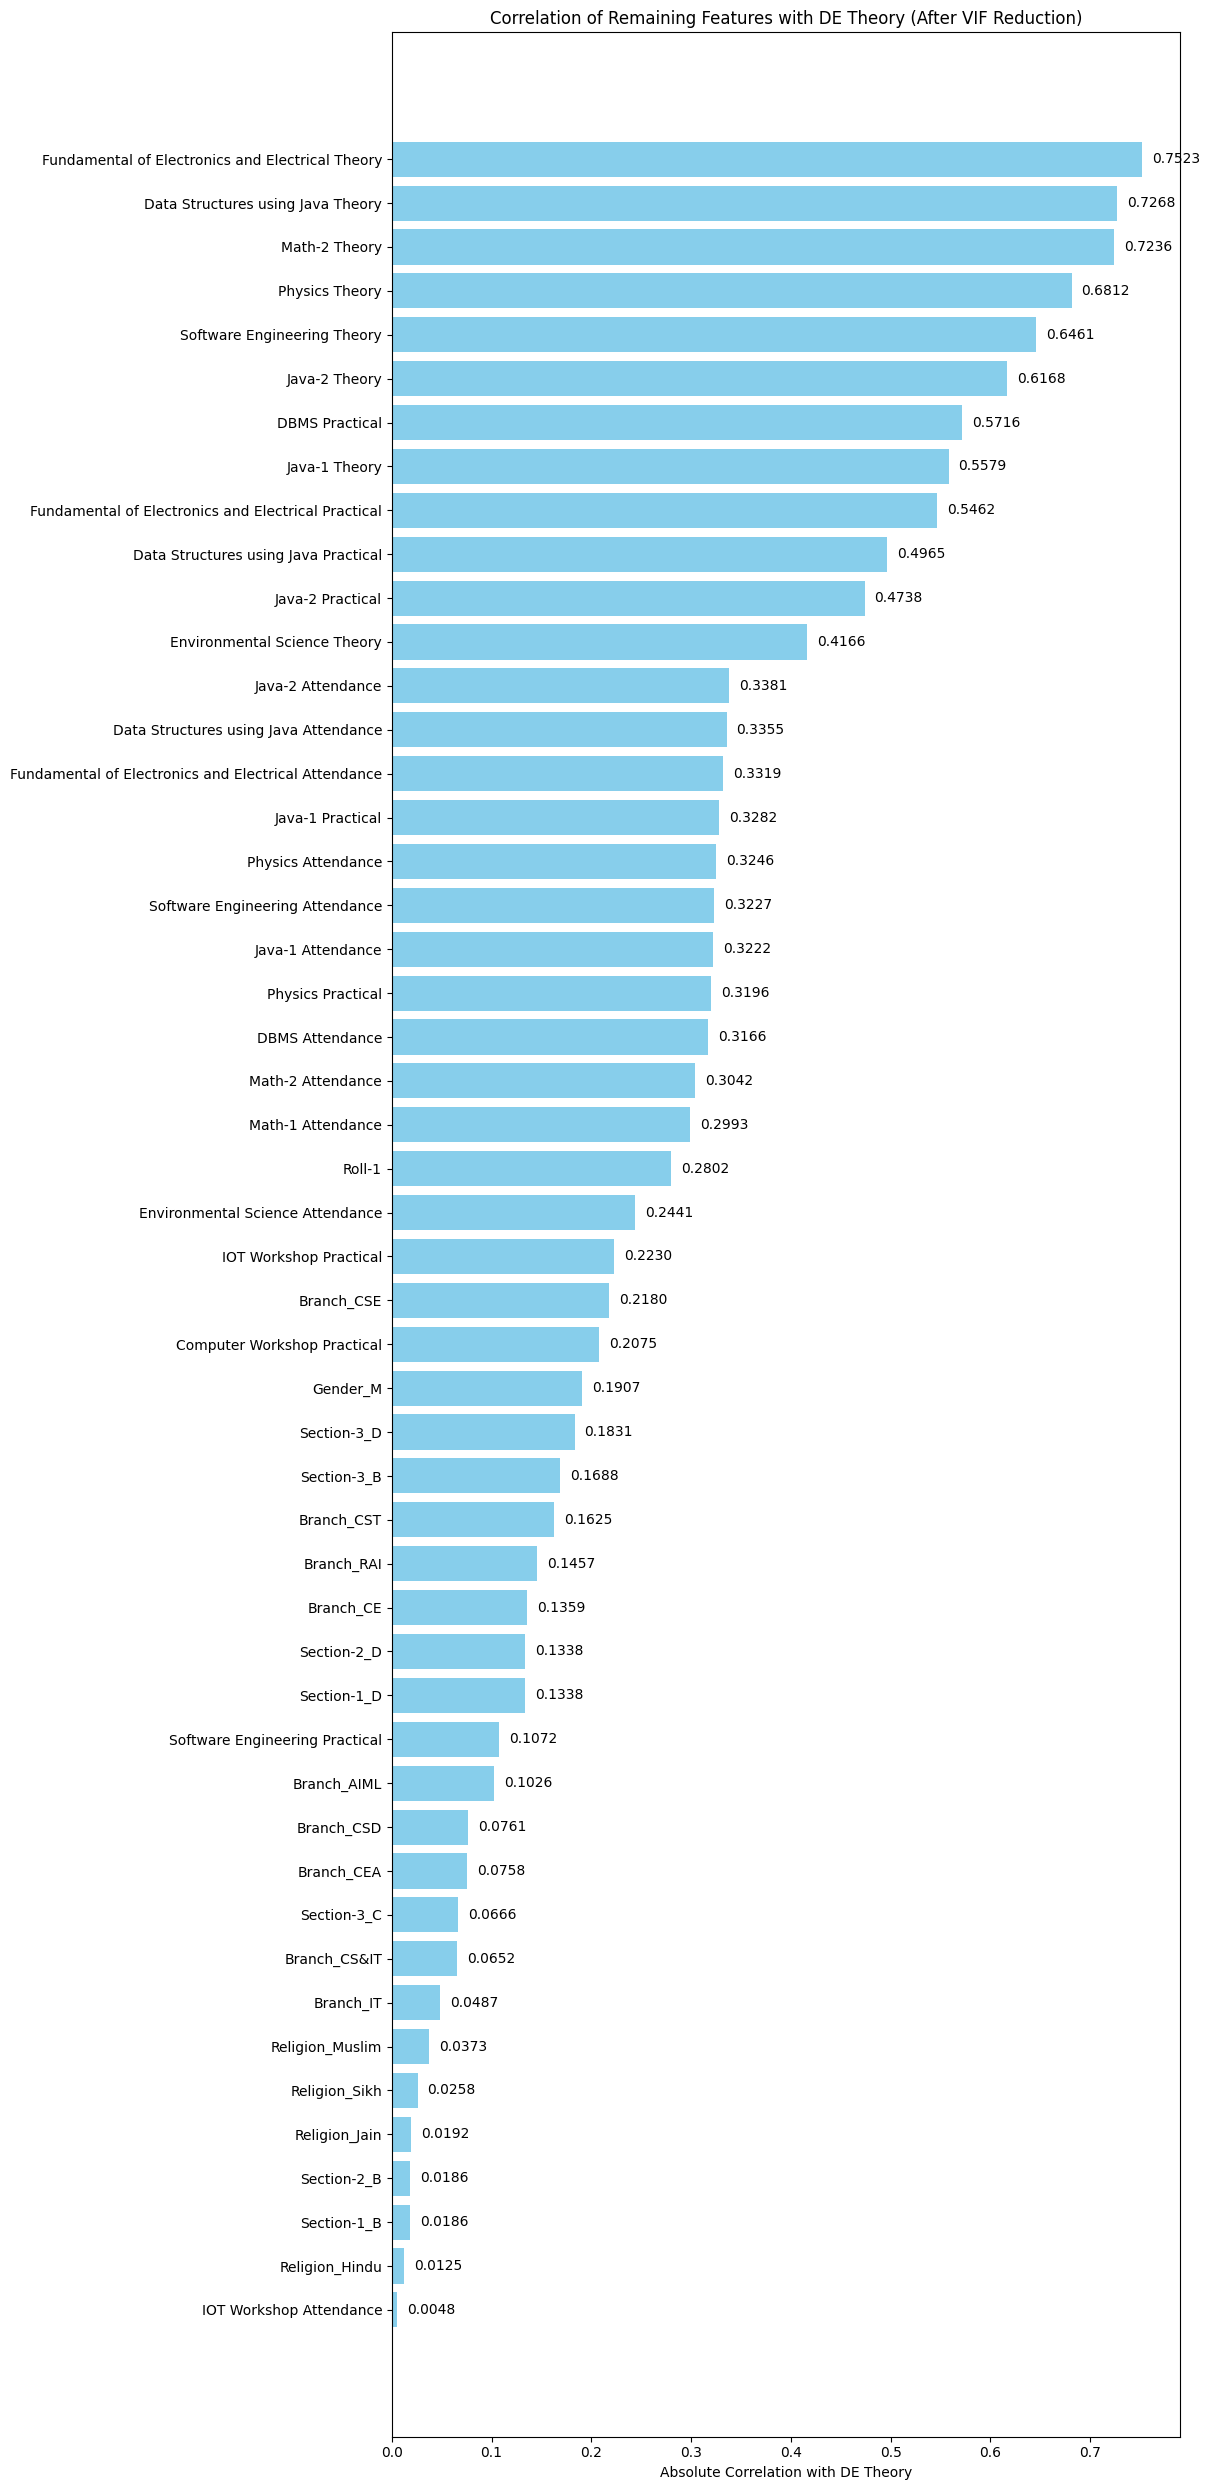

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Read the math train data
try:
    df = pd.read_csv('../train_dataset.csv')
except FileNotFoundError:
    print("Error: 'train_dataset.csv' not found. Please ensure the file path is correct.")
    exit()

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3',
                      'Math-3 Theory', 'DE Practical', 'FSD Theory', 'FSD Practical',
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory',
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ['Section-1', 'Section-2', 'Section-3']:
    if section in df.columns:  # Check if column exists
        df[section] = df[section].astype(str).str[0]  # Ensure it's string type before .str accessor

# Print the first 5 rows
print("Head of train_dataset.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a DataFrame for VIF calculations (including one-hot encoded categoricals)
df_encoded = df.copy()
for col in categorical_cols:
    if col in ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']:
        try:
            encoded = pd.get_dummies(df[col], prefix=col, drop_first=True)  # drop_first to avoid perfect multicollinearity
            df_encoded = pd.concat([df_encoded, encoded], axis=1)
            df_encoded = df_encoded.drop(columns=[col])
        except Exception as e:
            print(f"Could not encode column {col}: {e}")

# Ensure all columns are numeric for VIF calculation and handle potential NaNs
df_for_vif = df_encoded.drop(columns=['DE Theory'], errors='ignore').copy()
df_for_vif = df_for_vif.select_dtypes(include=[np.number])  # Select only numeric columns
df_for_vif = df_for_vif.fillna(df_for_vif.mean())  # Fill NaNs with mean

# Add constant for VIF calculation
X_vif = df_for_vif.copy()

# Check if 'DE Theory' is in the original df_encoded to calculate correlations
target_variable = 'DE Theory'
if target_variable not in df_encoded.columns:
    print(f"Warning: Target variable '{target_variable}' not found in df_encoded. Correlations with target cannot be computed.")
    correlations_with_de = {}
else:
    # Create dictionary of absolute correlations with DE Theory
    correlations_with_de = {}
    for col in df_encoded.columns:
        if col != target_variable and pd.api.types.is_numeric_dtype(df_encoded[col]):  # Ensure column is numeric
            try:
                corr = abs(df_encoded[col].corr(df_encoded[target_variable]))
                correlations_with_de[col] = corr
            except Exception as e:
                print(f"Could not calculate correlation for {col} with {target_variable}: {e}")
        elif col != target_variable:
            print(f"Skipping non-numeric column {col} for correlation with {target_variable}.")

# Print the correlation dictionary (sorted by absolute value)
print("\nAbsolute correlations with DE Theory:")
if correlations_with_de:
    for col, corr in sorted(correlations_with_de.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {corr:.4f}")
else:
    print("No correlations to display.")

# --- VIF Calculation ---
print("\nCalculating VIF...")
X_vif_const = add_constant(X_vif, has_constant='add')  # Adds a constant column for intercept

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]
vif_data = vif_data[vif_data["feature"] != 'const']  # Remove const VIF
print("\nInitial VIF values:")
print(vif_data.sort_values(by="VIF", ascending=False))

# Iteratively remove features with VIF > threshold (e.g., 10)
threshold_vif = 10
columns_to_drop_vif = []
features_for_vif_iter = X_vif.copy()

while True:
    if features_for_vif_iter.empty or features_for_vif_iter.shape[1] < 2:  # Need at least 2 features for VIF
        print("\nNot enough features to calculate VIF or all high VIF features removed.")
        break

    # Add constant for VIF calculation in each iteration
    temp_X_vif_const = add_constant(features_for_vif_iter, has_constant='add')
    
    vif_iter = pd.DataFrame()
    vif_iter["feature"] = temp_X_vif_const.columns
    try:
        vif_iter["VIF"] = [variance_inflation_factor(temp_X_vif_const.values, i) for i in range(temp_X_vif_const.shape[1])]
    except Exception as e:  # Catch potential errors like singular matrix
        print(f"Error calculating VIF: {e}. Stopping VIF reduction.")
        break

    vif_iter = vif_iter[vif_iter["feature"] != 'const']  # Remove const
    max_vif_row = vif_iter.sort_values(by="VIF", ascending=False).iloc[0]

    if max_vif_row["VIF"] > threshold_vif:
        feature_to_drop = max_vif_row["feature"]
        print(f"Dropping '{feature_to_drop}' with VIF: {max_vif_row['VIF']:.2f}")
        columns_to_drop_vif.append(feature_to_drop)
        features_for_vif_iter = features_for_vif_iter.drop(columns=[feature_to_drop])
    else:
        print("\nAll remaining features have VIF below threshold.")
        break

print("\nColumns to drop based on VIF >", threshold_vif, ":")
print(columns_to_drop_vif if columns_to_drop_vif else "No columns to drop based on VIF.")

# Create reduced DataFrame after VIF
df_reduced_vif = df_encoded.drop(columns=columns_to_drop_vif, errors='ignore')
print(f"\nShape of df_encoded: {df_encoded.shape}")
print(f"Shape of df_reduced_vif: {df_reduced_vif.shape}")
print("\nRemaining columns after VIF reduction:")
print(df_reduced_vif.columns.tolist())

# Plot correlations as a bar plot (using original correlations, for features remaining after VIF)
correlations_remaining = {
    col: corr for col, corr in correlations_with_de.items()
    if col in df_reduced_vif.columns and col != target_variable
}

if correlations_remaining:
    plt.figure(figsize=(12, max(8, len(correlations_remaining) * 0.5)))  # Adjust height based on number of features
    sorted_correlations_remaining = dict(sorted(correlations_remaining.items(), key=lambda item: item[1]))

    bars = plt.barh(list(sorted_correlations_remaining.keys()),
                    list(sorted_correlations_remaining.values()),
                    color='skyblue')
    plt.xlabel(f'Absolute Correlation with {target_variable}')
    plt.title(f'Correlation of Remaining Features with {target_variable} (After VIF Reduction)')
    plt.tight_layout()

    # Add correlation values on the bars
    for bar_obj in bars:
        width = bar_obj.get_width()
        plt.text(x=width + 0.01, y=bar_obj.get_y() + bar_obj.get_height()/2, s=f'{width:.4f}',
                 ha='left', va='center')
    plt.savefig('correlation_plot.png')
else:
    print("\nNo correlations to plot after VIF reduction or target variable issues.")

print("\nFinal selected features (excluding target):")
final_features = [col for col in df_reduced_vif.columns if col != target_variable]
print(final_features)

# Multiple Linear Regression

In [3]:
# Multiple Linear Regression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Read the train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'Math-3 Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch", 'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Define target and feature columns
target_col = 'DE Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize linear regression model
model = LinearRegression()

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores across folds
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE values
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Multiple Linear Regression")
print("Approach: multivariate regression with 5-Fold Cross-Validation and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV log
results_df = pd.DataFrame([{
    "Model": "Multiple Linear Regression",
    "Approach": "5-Fold CV + one-hot encoding",
    "MAE": round(mean_mae, 4)
}])

# Append to CSV or create if it doesn't exist
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Multiple Linear Regression
Approach: multivariate regression with 5-Fold Cross-Validation and one-hot encoding
MAE: 7.5616


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                        'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                        'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch",'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Without dropping High VIF columns: MAE: 7.5616

# drop columns with too high VIF(>10)
columns_to_drop = ['Math-1 Theory', 'DBMS Theory', 'Sem 2 Percentage', 'Sem 1 Percentage']

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Define target and feature columns
target_col = 'Math-3 Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize linear regression model
model = LinearRegression()

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores across folds
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE values
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Multiple Linear Regression (High VIF columns dropped)")
print("Approach: Multivariate regression with 5-Fold Cross-Validation and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV log
results_df = pd.DataFrame([{
    "Model": "Multiple Linear Regression (High VIF columns dropped)",
    "Approach": "5-Fold CV + one-hot encoding",
    "MAE": round(mean_mae, 4)
}])

# Append to CSV or create if it doesn't exist
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Multiple Linear Regression (High VIF columns dropped)
Approach: Multivariate regression with 5-Fold Cross-Validation and one-hot encoding
MAE: 6.6735


# Polynomial Regression

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'Math-3 Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch", 'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Define target and feature columns
target_col = 'DE Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 2)
polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 2)")
print("Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 2)",
    "Approach": "5-Fold CV + one-hot encoding + degree 2",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 2)
Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV and one-hot encoding
MAE: 28.8104


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'Math-3 Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch", 'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Drop columns with high VIF
columns_to_drop = ['Math-1 Theory', 'DBMS Theory', 'Sem 2 Percentage', 'Sem 1 Percentage']

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Define target and feature columns
target_col = 'DE Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 2)
polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 2, High VIF columns dropped)")
print("Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV, one-hot encoding, and high VIF columns dropped")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 2, High VIF columns dropped)",
    "Approach": "5-Fold CV + one-hot encoding + degree 2 + high VIF columns dropped",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 2, High VIF columns dropped)
Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV, one-hot encoding, and high VIF columns dropped
MAE: 33.3695


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'Math-3 Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch", 'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Define target and feature columns
target_col = 'DE Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 3)
polyreg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 3)")
print("Approach: Full-feature polynomial regression (degree 3) with 5-Fold CV and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 3)",
    "Approach": "5-Fold CV + one-hot encoding + degree 3",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 3)
Approach: Full-feature polynomial regression (degree 3) with 5-Fold CV and one-hot encoding
MAE: 18.0693


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'Math-3 Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch", 'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Drop columns with high VIF
columns_to_drop = ['Math-1 Theory', 'DBMS Theory', 'Sem 2 Percentage', 'Sem 1 Percentage']

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Define target and feature columns
target_col = 'DE Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 3)
polyreg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 3, High VIF columns dropped)")
print("Approach: Full-feature polynomial regression (degree 3) with 5-Fold CV, one-hot encoding, and high VIF columns dropped")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 3, High VIF columns dropped)",
    "Approach": "5-Fold CV + one-hot encoding + degree 3 + high VIF columns dropped",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 3, High VIF columns dropped)
Approach: Full-feature polynomial regression (degree 3) with 5-Fold CV, one-hot encoding, and high VIF columns dropped
MAE: 18.8222


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'Math-3 Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch", 'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Define target and feature columns
target_col = 'DE Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 4)
polyreg = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 4)")
print("Approach: Full-feature polynomial regression (degree 4) with 5-Fold CV and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 4)",
    "Approach": "5-Fold CV + one-hot encoding + degree 4",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 4)
Approach: Full-feature polynomial regression (degree 4) with 5-Fold CV and one-hot encoding
MAE: 16.7219


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'Math-3 Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch", 'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Drop columns with high VIF
columns_to_drop = ['Math-1 Theory', 'DBMS Theory', 'Sem 2 Percentage', 'Sem 1 Percentage']

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Define target and feature columns
target_col = 'DE Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 4)
polyreg = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 4, High VIF columns dropped)")
print("Approach: Full-feature polynomial regression (degree 4) with 5-Fold CV, one-hot encoding, and high VIF columns dropped")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 4, High VIF columns dropped)",
    "Approach": "5-Fold CV + one-hot encoding + degree 4 + high VIF columns dropped",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 4, High VIF columns dropped)
Approach: Full-feature polynomial regression (degree 4) with 5-Fold CV, one-hot encoding, and high VIF columns dropped
MAE: 17.5248


# Random forest regressor